<a href="https://colab.research.google.com/github/merlinkalokerinos/Studies-OAMK/blob/main/Notebook_Munich_rental_ML_model_OAMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

In [7]:
# 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
 !google-drive-ocamlfuse -cc

/bin/bash: google-drive-ocamlfuse: command not found


In [9]:
 !pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
 !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import os 
import yaml 
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

# ML imports
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Evaluation
from sklearn.model_selection import train_test_split
from sklearn import*

import tarfile
import urllib.request

import lightgbm as lgb

# Data transformation

In [12]:
df01 = pd.read_csv('/content/drive/MyDrive/Lectures OAMK/Data Analysis Case Study/knime_export.csv')
df02=pd.read_csv('/content/drive/MyDrive/Lectures OAMK/Data Analysis Case Study/data per district/Indikatoren München Gesamt.csv')

df01.head(20)

,url,scraped location,price,rooms,square metres,geo location,city district,district code,district name
0,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1995.0,1.0,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
1,https://www.immobilo.de/immobilien/luise-kiess...,81377 Munich,1349.0,1.0,50.0,"München, Bayern, Deutschland",20 Hadern,20,Hadern
2,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1950.0,1.0,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
3,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1345.0,1.0,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
4,https://www.immobilo.de/immobilien/rossholzene...,81735 Munich,1999.0,1.0,85.0,"München, Bayern, Deutschland",14 Berg am Laim,14,Berg am Laim
5,https://www.immobilo.de/immobilien/eintrachtst...,81541 Munich,1000.0,1.0,25.0,"München, Bayern, Deutschland",05 Au - Haidhausen,5,Au - Haidhausen
6,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,2099.0,1.0,40.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
7,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,1769.0,1.0,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
8,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,1769.0,1.0,31.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach
9,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,1899.0,1.0,27.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach


In [13]:
df02.head(5)

,city district,crime rate,Total space,Total building and open spaces absolute,Total building and open spaces in %,Absolute living space,in % of the building and free space,Absolute traffic zones,Traffic zones in %,"Absolute outdoor parks, forest and water areas",...,Carrier of the facility - Municipal,Born - total,Born - not german,Died - total,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1
0,01 Altstadt - Lehel,0.08,314.59,149.11,47.4,52.19,35.0,90.67,28.8,74.11,...,"24,6",239,13,160,17,79,-4,11.3,47.4,7.6
1,02 Ludwigsvorstadt - Isarvorstadt,0.13,440.17,240.09,54.5,131.39,54.7,107.60,24.4,92.17,...,"38,0",598,62,296,33,302,29,11.6,44.2,5.7
2,03 Maxvorstadt,0.04,429.82,296.38,69.0,145.46,49.1,103.01,24.0,30.29,...,"36,9",660,74,238,35,422,39,12.8,44.1,4.6
3,04 Schwabing - West,0.03,436.33,274.73,63.0,189.59,69.0,108.79,24.9,52.81,...,"18,3",811,105,518,52,293,53,11.8,47.0,7.5
4,05 Au - Haidhausen,0.04,422,236.58,56.1,145.89,61.7,127.10,30.1,54.03,...,"43,6",760,85,444,60,316,25,12.3,50.7,7.2


In [14]:
# convert room column to int 
df01["rooms"] = df01["rooms"].astype(int)

In [15]:
# add price per square and round to two decimals
df01["price per square"] = df01["price"]/df01["square metres"]
df01 = df01.round({'price per square': 2})

In [16]:
# merge apartment data with demographic data
df=pd.merge(df01,df02, left_on=['city district'], right_on= ['city district'])
df.head()

,url,scraped location,price,rooms,square metres,geo location,city district,district code,district name,price per square,...,Carrier of the facility - Municipal,Born - total,Born - not german,Died - total,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1
0,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1995.0,1,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach,83.12,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4
1,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1950.0,1,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach,81.25,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4
2,https://www.immobilo.de/immobilien/triebstrass...,80993 Munich,1345.0,1,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach,56.04,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4
3,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,2099.0,1,40.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach,52.48,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4
4,https://www.immobilo.de/immobilien/hanebergstr...,80637 Munich,1769.0,1,24.0,"München, Bayern, Deutschland",10 Moosach,10,Moosach,73.71,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4


In [17]:
# lets count data sets by district
df.groupby('district name')['district name'].count().head(25)

district name
 Allach - Untermenzing                                             203
 Altstadt - Lehel                                                  225
 Au - Haidhausen                                                   255
 Aubing - Lochhausen - Langwied                                    255
 Berg am Laim                                                      138
 Bogenhausen                                                       446
 Feldmoching - Hasenbergl                                          120
 Hadern                                                            156
 Laim                                                              237
 Ludwigsvorstadt - Isarvorstadt                                    257
 Maxvorstadt                                                       220
 Milbertshofen - Am Hart                                           276
 Moosach                                                           190
 Neuhausen - Nymphenburg                                       

Filter

In [18]:
# calculate missing attributes
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df) 

# convert and print ratios
ratio_missing = np.round(ratio_missing * 100, 3) 
print(f"{ratio_missing}% of data ({num_missing} data points) have missing values!")

0.0% of data (0 data points) have missing values!


In [19]:
df.loc[df.isnull().sum(axis=1) == 1] # show missing values, if any are left

,url,scraped location,price,rooms,square metres,geo location,city district,district code,district name,price per square,...,Carrier of the facility - Municipal,Born - total,Born - not german,Died - total,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1


In [20]:
df.isnull().sum(axis=0) # count missing values per column, if any are left

url                                             0
scraped location                                0
price                                           0
rooms                                           0
square metres                                   0
                                               ..
Born and Died (delta) - total                   0
Born and Died (delta) - not german              0
Birth and death rates - crude birth rate.1      0
Birth and death rates - general birth rate.1    0
Birth and death rates - death rate.1            0
Length: 165, dtype: int64

# Peek into our data

In [21]:
pd.set_option('display.max_rows', 30)
print(df.groupby('district name')['price per square'].mean().sort_values(ascending=False))

district name
 Altstadt - Lehel                                                  32.353200
 Moosach                                                           29.430105
 Au - Haidhausen                                                   28.504431
 Ludwigsvorstadt - Isarvorstadt                                    28.313152
 Schwabing - Freimann                                              28.121908
 Berg am Laim                                                      26.715072
 Milbertshofen - Am Hart                                           26.683007
 Schwanthalerhöhe                                                  26.304416
 Ramersdorf - Perlach                                              26.224932
 Schwabing - West                                                  26.186517
 Obergiesing - Fasangarten                                         26.013268
 Maxvorstadt                                                       25.740227
 Sendling                                                     

In [22]:
# lets collect the price per square values
derived_df = df['price per square']
print(derived_df, "\n")

0       83.12
1       81.25
2       56.04
3       52.48
4       73.71
        ...  
6407    16.00
6408    20.57
6409    24.53
6410    23.73
6411    19.06
Name: price per square, Length: 6412, dtype: float64 



In [23]:
df = df.dropna() # drop N/A sets, if any (just in case)
df = df.reset_index(drop=True) # re-index our data

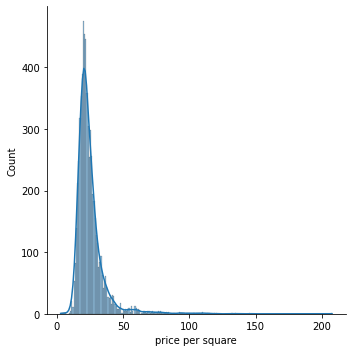

In [24]:
# lets look at the distribution
sns.displot(data=df, x="price per square", kde=True);

In [25]:
# display option for whole url / reset to default (50 characters)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', 50)

# view by price, descending
df01.sort_values(by='price', ascending=True)

,url,scraped location,price,rooms,square metres,geo location,city district,district code,district name,price per square
2498,https://www.immonet.de/angebot/45944377,"München, Ramersdorf-Perlach",60.0,1,21.00,"Ramersdorf-Perlach, München, Bayern, Deutschland",16 Ramersdorf - Perlach,16,Ramersdorf - Perlach,2.86
1394,https://www.immobilienscout24.de/expose/132874061,"Zehntfeldstr. 119, Gartenstadt Trudering, München",120.0,1,27.00,"119, Zehntfeldstraße, Gartenstadt Trudering, B...",14 Berg am Laim,14,Berg am Laim,4.44
1914,https://www.immowelt.de/expose/24u5m5z,"Reinmarplatz 13, München (Neuhausen-Nymphenburg)",289.3,1,26.30,"Reinmarplatz, Gern, Neuhausen, Neuhausen-Nymph...",09 Neuhausen - Nymphenburg,9,Neuhausen - Nymphenburg,11.00
827,https://www.immobilienscout24.de/expose/131798275,"Forstenried, München",300.0,2,63.00,"Forstenried, Thalkirchen-Obersendling-Forstenr...",19 Thalkirchen - Obersendling - Forstenried - ...,19,Thalkirchen - Obersendling - Forstenried - Fü...,4.76
5316,https://www.immobilo.de/immobilien/tauschwohnu...,81476 München,300.0,2,63.00,"Würmseestraße 39, 81476 München, Würmseestraße...",19 Thalkirchen - Obersendling - Forstenried - ...,19,Thalkirchen - Obersendling - Forstenried - Fü...,4.76
...,...,...,...,...,...,...,...,...,...,...
4859,https://www.immobilo.de/immobilien/aussergewoe...,81675 München,9890.0,9,378.03,"Ismaninger Str. 102, 81675 München, Ismaninger...",13 Bogenhausen,13,Bogenhausen,26.16
6305,https://www.wohnung-jetzt.de/ad/29955809/,"80802 München, Schwabing-Freimann",18500.0,24,700.00,"Schwabing-Freimann, München, Bayern, Deutschland",12 Schwabing - Freimann,12,Schwabing - Freimann,26.43
5241,https://www.immobilo.de/immobilien/erstbezug-8...,80802 München,18500.0,24,700.00,"Biedersteiner Str. 29, 80802 München, Biederst...",12 Schwabing - Freimann,12,Schwabing - Freimann,26.43
2968,https://www.immonet.de/angebot/47013851,"München, Maxvorstadt",18500.0,24,700.00,"Maxvorstadt, München, Bayern, Deutschland",03 Maxvorstadt,3,Maxvorstadt,26.43


=> seems like those are hotel rooms rentable per month, this will drastically increase our average price per square meter, since those have up to ten times the average price

In [26]:
# lets get an overview of table values and check the average price per square
# the average rent price in Germany is around 10€ per square meter
# the average rent price in Munich has surpased 20€ per square meter according to engel & völkers
description = df.describe()
description

,price,rooms,square metres,district code,price per square,crime rate,Total building and open spaces in %,Absolute living space,in % of the building and free space,Absolute traffic zones,...,Migration rates by nationality - Exterior migration (not german),Migration rates by nationality - overall migration (german),Migration rates by nationality - overall migration (not german),Born - not german,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1
count,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,...,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,1608.254655,2.185434,69.663366,13.402215,24.937352,0.041694,50.467623,416.730649,64.881036,233.178702,...,20.641251,-12.656254,20.961510,135.526825,65.130069,219.283375,70.396756,11.272286,51.940362,7.898503
std,972.642770,1.204973,40.407313,6.927434,11.240843,0.025042,9.949737,226.543233,12.210929,105.645271,...,12.347733,11.162502,20.884919,67.704875,33.692781,112.686287,43.420046,0.732845,4.392744,1.278199
min,60.000000,1.000000,20.420000,1.000000,2.860000,0.010000,23.300000,52.190000,35.000000,76.730000,...,-4.400000,-31.500000,-28.300000,13.000000,17.000000,1.000000,-4.000000,9.400000,44.100000,4.600000
25%,1050.000000,1.000000,41.400000,7.000000,19.040000,0.030000,47.400000,239.560000,59.600000,128.580000,...,10.700000,-19.500000,11.700000,85.000000,40.000000,128.000000,34.000000,10.700000,49.600000,7.000000
50%,1390.000000,2.000000,64.000000,14.000000,22.250000,0.040000,52.500000,380.220000,67.200000,265.230000,...,20.800000,-14.700000,22.500000,123.000000,59.000000,188.000000,59.000000,11.100000,52.500000,7.700000
75%,1900.000000,3.000000,86.425000,19.000000,27.270000,0.040000,56.600000,694.600000,72.800000,331.380000,...,27.900000,-7.600000,35.500000,174.000000,68.000000,303.000000,112.000000,11.800000,54.300000,8.800000
max,18500.000000,24.000000,700.000000,25.000000,207.620000,0.130000,69.000000,732.750000,84.300000,425.560000,...,48.000000,15.800000,62.300000,296.000000,173.000000,486.000000,154.000000,12.800000,64.400000,9.600000


=> the average price, as expected, is at around 25€ for our data set, which is high compared to the average suggested by engel & völkers

I SUGGEST DELETION OF ALL ENTRIES THAT DEVIATE FROM THE MEAN BY MORE THAN DOUBLE THE AVERAGE PRICE, ALSO SOME VERY EXPENSIVE APPARTMENTS ARE OUTLIERS, AS WELL AS SOME CHEAP ONES, THAT ARE UP FOR "TRADE", WE SET A LOWER AND UPPER BOUNDARY TO INCREASE DATA QUALITY AND RELIABILIY OF OUR MODEL

In [27]:
# filter for appartments with very high price or price per square metre
filtered_df = df.query('`price per square` >= 50 | price >= 5000 | price <= 400')
print(filtered_df.count())

url                                             259
scraped location                                259
price                                           259
rooms                                           259
square metres                                   259
                                               ... 
Born and Died (delta) - total                   259
Born and Died (delta) - not german              259
Birth and death rates - crude birth rate.1      259
Birth and death rates - general birth rate.1    259
Birth and death rates - death rate.1            259
Length: 165, dtype: int64


In [28]:
# drop the filtered rows, reindex and build new description table for bins
df = df.drop(filtered_df.index.values)
df = df.reset_index(drop=True) # re-index our data
description = df.describe()
description

,price,rooms,square metres,district code,price per square,crime rate,Total building and open spaces in %,Absolute living space,in % of the building and free space,Absolute traffic zones,...,Migration rates by nationality - Exterior migration (not german),Migration rates by nationality - overall migration (german),Migration rates by nationality - overall migration (not german),Born - not german,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1
count,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,...,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000
mean,1542.339599,2.185113,69.184253,13.499919,23.451853,0.041414,50.469478,419.272272,65.041557,233.397626,...,20.628474,-12.463319,21.196490,135.844954,64.976434,219.478466,70.868519,11.271737,51.976743,7.903039
std,730.716887,1.024263,33.229363,6.938826,6.571601,0.024833,10.032629,226.444283,12.181601,105.504379,...,12.215733,11.231095,20.856685,67.218207,33.279185,112.826172,43.408193,0.736868,4.422963,1.279719
min,420.000000,1.000000,20.420000,1.000000,6.820000,0.010000,23.300000,52.190000,35.000000,76.730000,...,-4.400000,-31.500000,-28.300000,13.000000,17.000000,1.000000,-4.000000,9.400000,44.100000,4.600000
25%,1033.940000,1.000000,43.240000,7.000000,18.970000,0.030000,47.400000,239.560000,59.600000,128.580000,...,10.700000,-19.500000,11.700000,85.000000,40.000000,128.000000,34.000000,10.700000,49.600000,7.200000
50%,1350.000000,2.000000,65.000000,14.000000,22.030000,0.040000,52.500000,380.220000,67.200000,265.230000,...,21.800000,-12.900000,22.500000,123.000000,59.000000,188.000000,59.000000,11.100000,52.500000,8.000000
75%,1890.000000,3.000000,86.930000,19.000000,26.550000,0.040000,56.600000,694.600000,72.800000,331.380000,...,27.900000,-7.600000,35.500000,174.000000,68.000000,303.000000,112.000000,11.800000,54.300000,8.800000
max,4990.000000,9.000000,240.000000,25.000000,49.970000,0.130000,69.000000,732.750000,84.300000,425.560000,...,48.000000,15.800000,62.300000,296.000000,173.000000,486.000000,154.000000,12.800000,64.400000,9.600000


In [29]:
avgkaufpreis = df["price per square"].mean()
print(avgkaufpreis)

23.451852754753585


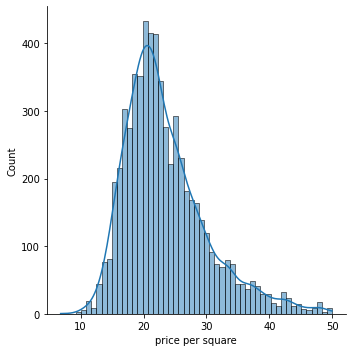

In [30]:
sns.displot(data=df, x="price per square", kde=True);

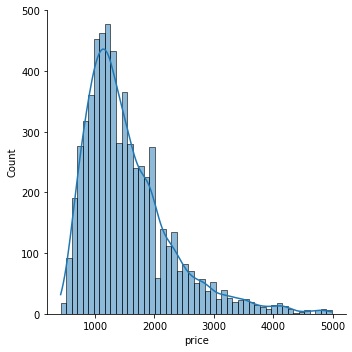

In [31]:
sns.displot(data=df, x="price", kde=True);

In [32]:
# display option for whole url / reset to default (50 characters)
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_colwidth', 50)

# view by price, descending
df.sort_values(by='price', ascending=True)

,url,scraped location,price,rooms,square metres,geo location,city district,district code,district name,price per square,...,Carrier of the facility - Municipal,Born - total,Born - not german,Died - total,Died - not german,Born and Died (delta) - total,Born and Died (delta) - not german,Birth and death rates - crude birth rate.1,Birth and death rates - general birth rate.1,Birth and death rates - death rate.1
29,https://www.immobilienscout24.de/expose/132885870,"Alt-Moosach, München",420.0,1,23.0,"Alt-Moosach, Alt Moosach, Moosach, München, Bayern, 80992, Deutschland",10 Moosach,10,Moosach,18.26,...,"62,7",595,111,458,63,137,48,10.9,52.0,8.4
4965,https://www.immobilienscout24.de/expose/124520250,"Waldtrudering, München",420.0,1,23.0,"Waldtrudering, Trudering-Riem, München, Bayern, 81827, Deutschland",15 Trudering - Riem,15,Trudering - Riem,18.26,...,"46,1",778,149,475,37,303,112,10.5,54.7,6.4
4431,https://www.immobilienscout24.de/expose/132936356,"Dachauer Straße 245, Dom Pedro, München",450.0,1,30.0,"245, Dachauer Straße, Ebenau, Dom Pedro, Neuhausen-Nymphenburg, München, Bayern, 80637, Deutschland",09 Neuhausen - Nymphenburg,9,Neuhausen - Nymphenburg,15.00,...,"37,0","1,251.00",153,765,94,486,59,12.5,54.2,7.6
5971,https://www.wohnungsboerse.net/immodetail/29351779,München - Obermenzing,475.0,1,36.0,"Obermenzing, Verdistraße, Obermenzing, Pasing-Obermenzing, München, Bayern, 81247, Deutschland",21 Pasing - Obermenzing,21,Pasing - Obermenzing,13.19,...,"35,6",814,160,654,68,160,92,10.6,54.5,8.5
1995,https://www.immobilo.de/immobilien/1-zimmerappartement-9YJ8ZT?t=apartment:rental&ut=&pf=&pt=&rf=&rt=&sf=&st=&ff=&ft=&yf=&yt=&r=0km&s=relevance&pa=&u=&l=M%C3%BCnchen&a=de.muenchen&page=151&serpPage=151,81245 München,475.0,1,36.0,"Altostr. 15a, 81245 München, Marzellgasse, Aubing, Altaubing, Aubing-Lochhausen-Langwied, München, Bayern, 81245, Deutschland",22 Aubing - Lochhausen - Langwied,22,Aubing - Lochhausen - Langwied,13.19,...,"44,6",615,147,395,35,220,112,12.4,64.4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,https://vrm-immo.de/immobilien/moderne-moeblierte-stadtvilla-in-nymphenburg-CSTVFN?t=apartment:rental&ut=&pf=&pt=&rf=0&rt=0&sf=&st=&ff=&ft=&yf=&yt=&r=0km&s=relevance&pa=&u=&l=M%C3%BCnchen&page=5&serpPage=5,80638 München,4900.0,5,145.0,"Menziger Str. 1, 80638 München, Nördliche Auffahrtsallee, Nymphenburg, Neuhausen-Nymphenburg, München, Bayern, 80638, Deutschland",09 Neuhausen - Nymphenburg,9,Neuhausen - Nymphenburg,33.79,...,"37,0","1,251.00",153,765,94,486,59,12.5,54.2,7.6
5637,https://www.wohnungsboerse.net/immodetail/29394941,München - Harlaching,4900.0,4,216.0,"Harlaching, Untergiesing-Harlaching, München, Bayern, 81545, Deutschland",18 Untergiesing - Harlaching,18,Untergiesing - Harlaching,22.69,...,"41,5",598,90,494,56,104,34,11.3,52.3,9.3
4310,https://www.wohnungsboerse.net/immodetail/29283035,München - Neuhausen,4950.0,3,210.0,"München-Neuhausen, Landsberger Straße, Westend, Friedenheim, Laim, München, Bayern, 80339, Deutschland",25 Laim,25,Laim,23.57,...,"42,6",653,119,465,59,188,60,11.5,51.5,8.2
4567,https://www.immobilo.de/immobilien/spektakulaere-3-5-zi-maisonettewohnung-in-gern-nymphenburg-CX5GYK?t=apartment:rental&ut=&pf=&pt=&rf=&rt=&sf=&st=&ff=&ft=&yf=&yt=&r=0km&s=relevance&pa=&u=&l=M%C3%BCnchen&a=de.muenchen&page=155&serpPage=155,80637 München,4950.0,3,210.0,"Heideckstr., 80637 München, Heideckstraße, Ebenau, Dom Pedro, Neuhausen-Nymphenburg, München, Bayern, 80637, Deutschland",09 Neuhausen - Nymphenburg,9,Neuhausen - Nymphenburg,23.57,...,"37,0","1,251.00",153,765,94,486,59,12.5,54.2,7.6


# Prepare testing data

In [33]:
# Define four equal sets

bins = [0] + list(description["price per square"][
    ["25%", "50%", "75%", "max"]
].astype(float))
print(bins) # 

[0, 18.97, 22.03, 26.55, 49.97]


In [34]:
# Categorize data according to their bin

df["house_cat"] = pd.cut(
    df["price per square"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)



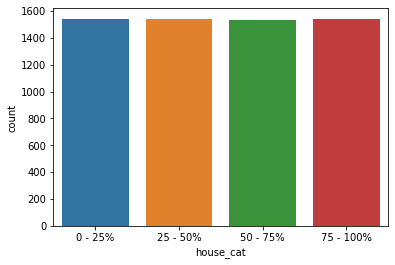

In [35]:
# lets visualize the bins
sns.countplot(data=df, x="house_cat");

In [36]:
# compare the numbers
print(df.groupby("house_cat")["house_cat"].count())

house_cat
0 - 25%      1541
25 - 50%     1540
50 - 75%     1534
75 - 100%    1538
Name: house_cat, dtype: int64


In [37]:
# defining train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=69)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

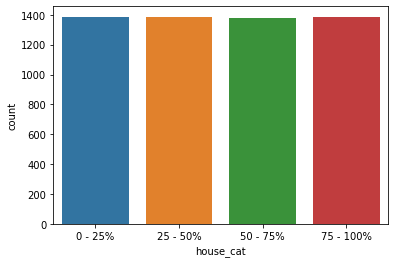

In [38]:
# visualize train bins
sns.countplot(data=df_train, x="house_cat");

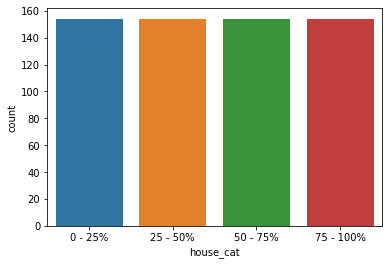

In [39]:
# visualize test bins
sns.countplot(data=df_test, x="house_cat");

In [40]:
# drop the category from the data frame
train = df_train.drop("house_cat", axis=1)
test = df_test.drop("house_cat", axis=1)



# Correlation calculation

In [41]:
train.corr()["price per square"].abs().sort_values(ascending=False)

price per square                                                             1.000000
rooms                                                                        0.367149
square metres                                                                0.365725
Population  - married                                                        0.269357
Population  - single                                                         0.264891
                                                                               ...   
Inner-city migration movements by origin and destination city district 7     0.029420
Total building and open spaces in %                                          0.028595
Population ratios  - Overageing ratio                                        0.025573
Inner-city migration movements by origin and destination city district 10    0.015153
Population  - not german                                                     0.008292
Name: price per square, Length: 86, dtype: float64

In [42]:
def engineer_features(df):
    df["ratio_rooms"] = df["square metres"] / df["rooms"]
    return df

In [43]:
train = engineer_features(train)
test = engineer_features(test)

In [44]:

dfcorr = train.corr()["price per square"].abs().sort_values(ascending=False)
#dfcorr.head(50)
pd.set_option('display.max_rows', 158)
dfcorr.head(15)

price per square                                                              1.000000
rooms                                                                         0.367149
square metres                                                                 0.365725
Population  - married                                                         0.269357
Population  - single                                                          0.264891
Private households by household type - Couple without minor child/children    0.262825
Private households by household size - household size in persons (2)          0.260233
Inner-city migration movements by origin and destination city district 1      0.259330
district code                                                                 0.256995
Private households by household type - Single person household                0.250975
Private households by household size - household size in persons (3)          0.246025
Migration rates - Internal migration       

# ML-Coding | Linear regression

In [45]:

df1=df

# drop unnecessary values
df2= df1.drop(['url', 'scraped location','city district','geo location','district name','price'], 1)

df2 = df2.dropna() # delete N/A values, if any are left
df2 = df2.reset_index(drop=True) # re-index

def get_features_and_targets(df2):
    x = df2.drop(["price per square"], axis=1).values
    y = np.stack(df2["price per square"])
    return x, y

description = df2.describe()

bins = [0] + list(description["price per square"][
    ["25%", "50%", "75%","max"]
].astype(float))

df2["house_cat"] = pd.cut(
    df2["price per square"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=69)
for train_index, test_index in split.split(df2, df2["house_cat"]):
    df2_train = df2.loc[train_index]
    df2_test = df2.loc[test_index]
    
df2_train = df2_train.drop("house_cat", axis=1)
df2_test = df2_test.drop("house_cat", axis=1)

# convert categories to indicator variables
df2_train_ml = pd.get_dummies(df2_train) # One-Hot Encoding
df2_test_ml = pd.get_dummies(df2_test)

x_train, y_train = get_features_and_targets(df2_train_ml)
x_test, y_test = get_features_and_targets(df2_test_ml)

clf = LinearRegression()
clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


LinearRegression()

In [46]:
predictions = clf.predict(x_test)

In [47]:
print("Prediction\t|True Value")
print("-"*30)
for idx, (pred, annotation) in enumerate(zip(predictions, y_test)):
    if idx == 25:
        break
    pred = round(float(pred),2)
    annotation = float(annotation)
    print(f"{pred}\t\t|"+f"{annotation}")

Prediction	|True Value
------------------------------
24.83		|29.31
26.2		|31.14
25.46		|15.38
21.9		|22.86
23.19		|24.91
24.4		|21.19
24.59		|31.92
25.54		|22.57
20.36		|23.61
22.15		|22.24
24.07		|20.91
29.37		|32.26
19.68		|16.26
22.99		|27.45
20.46		|17.3
28.6		|25.87
24.51		|25.0
23.52		|19.24
18.4		|18.92
25.41		|27.8
28.89		|28.95
15.99		|23.78
24.04		|24.42
27.46		|36.63
28.84		|21.31


In [48]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [49]:
print(f"Average deviation is {np.round(mae)};")
print(f"Failure quota is {np.round(mae_ratio * 100)}%;")
print(f"Coefficient of determination (R^2) is {np.round(r2_score * 100)}%")

Average deviation is 4.0;
Failure quota is 19.0%;
Coefficient of determination (R^2) is 28.0%


In [50]:
df2_test.iloc[0]

rooms                                               1
square metres                                    29.0
district code                                      14
price per square                                29.31
crime rate                                       0.03
                                                ...  
Born and Died (delta) - total                     193
Born and Died (delta) - not german                 26
Birth and death rates - crude birth rate.1       11.8
Birth and death rates - general birth rate.1     54.9
Birth and death rates - death rate.1              7.7
Name: 422, Length: 159, dtype: object

In [51]:
for x in range(10):
  single_pred = clf.predict([x_test[x]])[0]
  print(f"Predicted price per square is " + str(round(single_pred,2)) + ".")
  print(f"Real value is {y_test[x]}.")
  print(" ")

Predicted price per square is 24.82.
Real value is 29.31.
 
Predicted price per square is 26.2.
Real value is 31.14.
 
Predicted price per square is 25.46.
Real value is 15.38.
 
Predicted price per square is 21.91.
Real value is 22.86.
 
Predicted price per square is 23.18.
Real value is 24.91.
 
Predicted price per square is 24.41.
Real value is 21.19.
 
Predicted price per square is 24.6.
Real value is 31.92.
 
Predicted price per square is 25.54.
Real value is 22.57.
 
Predicted price per square is 20.36.
Real value is 23.61.
 
Predicted price per square is 22.15.
Real value is 22.24.
 


In [52]:
print('Training accuracy {:.4f}'.format(clf.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(clf.score(x_test,y_test)))

Training accuracy 0.2449
Testing accuracy 0.2791


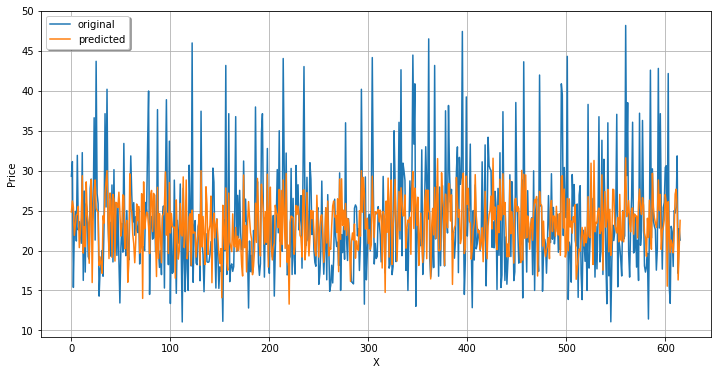

In [53]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# ML Coding | Light GBM

In [54]:
# display option for whole url / reset to default (50 characters)
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_colwidth', 50)

# define testing and target
df2.head(20)
target = df2["price per square"]
features = df2.drop(['price per square','house_cat'],axis=1)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=.1,random_state=69)

features.dtypes.head(200)

rooms                                                                                      int64
square metres                                                                            float64
district code                                                                              int64
crime rate                                                                               float64
Total space                                                                               object
Total building and open spaces absolute                                                   object
Total building and open spaces in %                                                      float64
Absolute living space                                                                    float64
in % of the building and free space                                                      float64
Absolute traffic zones                                                                   float64
Traffic zones in %            

In [55]:
# convert categories to indicator variables
x_train = pd.get_dummies(x_train) # One-Hot Encoding
x_test = pd.get_dummies(x_test)

x_train['district code'] = pd.Series(x_train['district code'], dtype='category')
x_test['district code'] = pd.Series(x_test['district code'], dtype='category')


In [56]:
# fitting model
model = lgb.LGBMRegressor(learning_rate=0.15,max_depth=-5,random_state=69,boosting_type='gbdt',num_leaves=128, objective='regression')
result= model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],verbose=20,eval_metric='logloss')

[20]	training's l2: 16.9658	valid_0's l2: 24.1098
[40]	training's l2: 13.5486	valid_0's l2: 22.886
[60]	training's l2: 11.8562	valid_0's l2: 22.5837
[80]	training's l2: 10.8027	valid_0's l2: 22.296
[100]	training's l2: 10.0958	valid_0's l2: 22.2741


In [57]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7659
Testing accuracy 0.4882


In [58]:
# prediction
y_pred = model.predict(x_test)


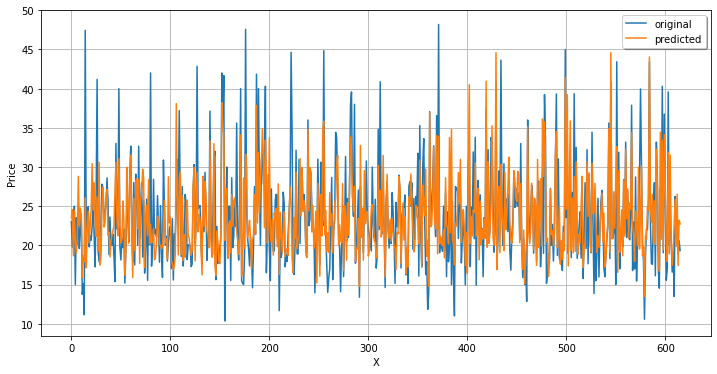

In [59]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

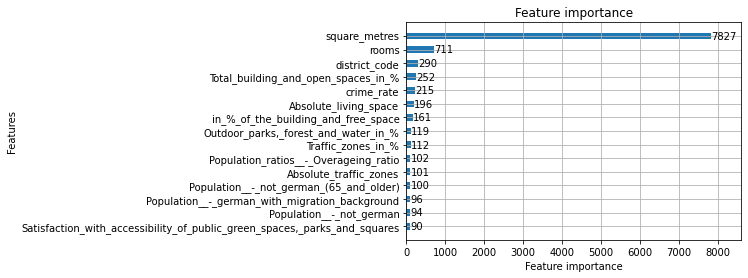

In [60]:
lgb.plot_importance(model,max_num_features=15,height=.5)

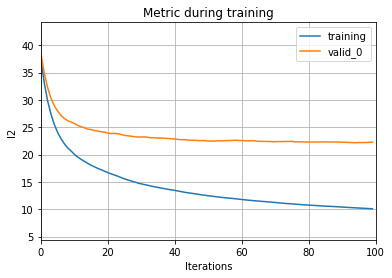

In [61]:
lgb.plot_metric(model)

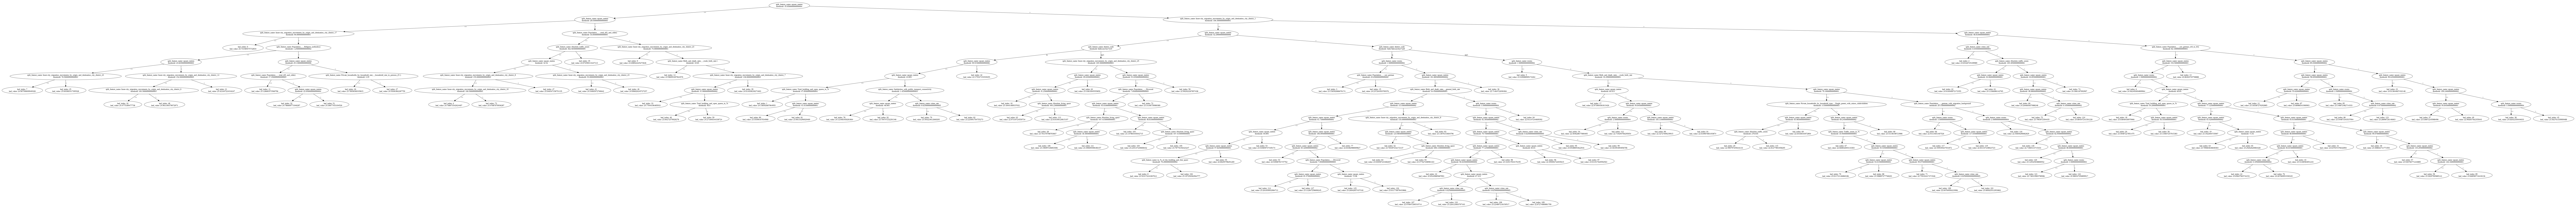

In [62]:
lgb.plot_tree(model,figsize=(240,240))

# ML Coding | Light GBM with less indicators


In [63]:
df3 = df1[['price per square','square metres','rooms', 'district code']]

target = df3["price per square"]
features = df3.drop("price per square",axis=1)

# train and test split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=.1,random_state=69)

In [64]:
# convert categories to indicator variables
x_train = pd.get_dummies(x_train) # One-Hot Encoding
x_test = pd.get_dummies(x_test)

x_train['district code'] = pd.Series(x_train['district code'], dtype='category')
x_test['district code'] = pd.Series(x_test['district code'], dtype='category')

In [65]:
# fitting model
model = lgb.LGBMRegressor(learning_rate=0.15,max_depth=-5,random_state=69,boosting_type='gbdt',num_leaves=256,objective='regression',task='train')
result= model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],verbose=20,eval_metric='logloss')

[20]	training's l2: 17.8643	valid_0's l2: 24.6872
[40]	training's l2: 14.0299	valid_0's l2: 23.1646
[60]	training's l2: 12.1088	valid_0's l2: 22.5183
[80]	training's l2: 10.949	valid_0's l2: 22.1222
[100]	training's l2: 10.1808	valid_0's l2: 22.2044


In [66]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7640
Testing accuracy 0.4898


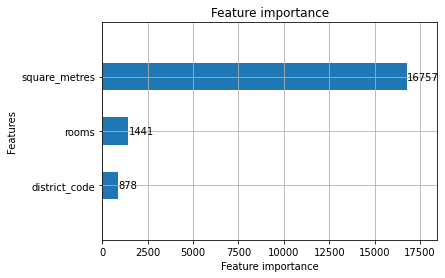

In [67]:
lgb.plot_importance(model,max_num_features=15,height=.5)

In [68]:
# prediction
y_pred = model.predict(x_test)

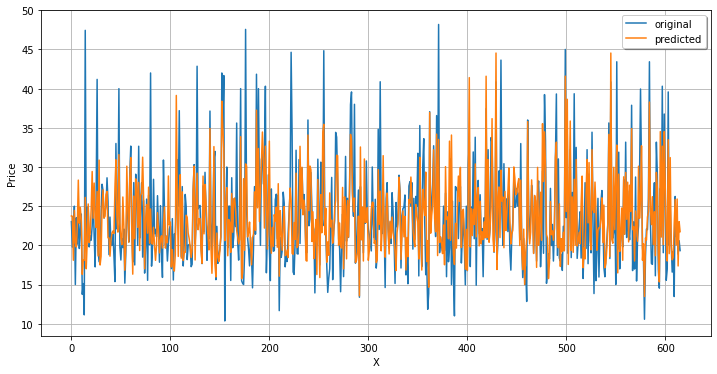

In [69]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

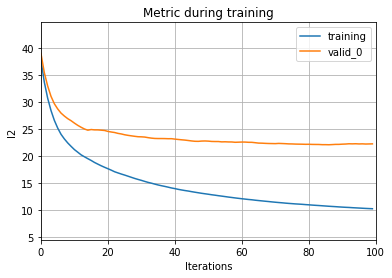

In [70]:
lgb.plot_metric(model)

In [71]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)

In [72]:
print(f"Average deviation is {np.round(mae)};")
print(f"Failure quota is {np.round(mae_ratio * 100)}%;")
print(f"Coefficient of determination (R^2) is {np.round(r2_score * 100)}%")

Average deviation is 3.0;
Failure quota is 14.0%;
Coefficient of determination (R^2) is 49.0%
